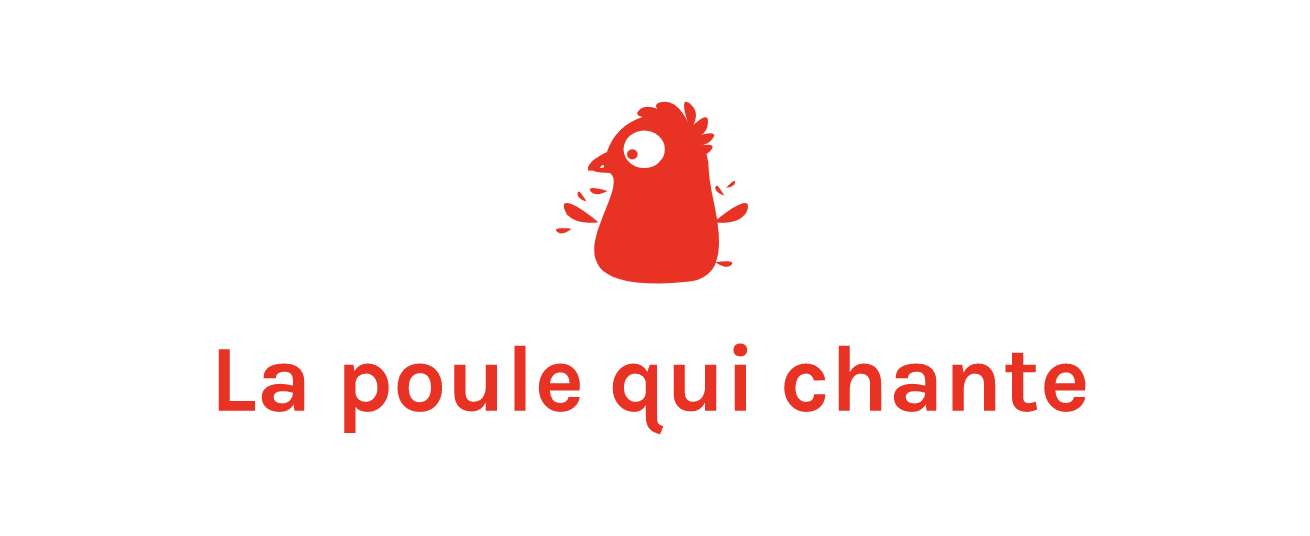

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scénario
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

# Mission
Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

# Sommaire

# Partie 1 : Données
## Disponibilité alimentaire 2017

In [2]:
df_disponibilite_alimentaire_2017 = pd.read_csv(
    "DisponibiliteAlimentaire_2017.csv")
df_population_2000_2018 = pd.read_csv("Population_2000_2018.csv")
Autres_indicateurs = pd.read_csv("Autres_indicateurs.csv")

In [3]:
df_disponibilite_alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
df_disponibilite_alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
df_disponibilite_alimentaire_2017.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [6]:
# visualisation des produits uniques
df_disponibilite_alimentaire_2017.Produit.unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [7]:
#filtre "viande de volailles"
df_disponibilite_alimentaire_2017_volailles = df_disponibilite_alimentaire_2017[
    df_disponibilite_alimentaire_2017["Produit"] == 'Viande de Volailles']

In [8]:
# Nettoyage des données
df_disponibilite_alimentaire_2017_volailles = df_disponibilite_alimentaire_2017_volailles.drop(
    ["Code Domaine", "Domaine", "Code zone", "Code Élément", "Code Produit", "Produit", "Code année", "Année", "Unité","Symbole", "Description du Symbole"], axis=1)

In [9]:
df_disponibilite_alimentaire_2017_volailles

,Zone,Élément,Valeur
651,Afghanistan,Production,28.00
652,Afghanistan,Importations - Quantité,29.00
653,Afghanistan,Variation de stock,0.00
654,Afghanistan,Disponibilité intérieure,57.00
655,Afghanistan,Pertes,2.00
...,...,...,...
176396,Zimbabwe,Nourriture,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,1.59


In [10]:
df_disponibilite_alimentaire_2017_volailles = pd.pivot_table(
    df_disponibilite_alimentaire_2017_volailles, values='Valeur', index="Zone", columns='Élément')

In [11]:
df_disponibilite_alimentaire_2017_volailles

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0


In [12]:
df_disponibilite_alimentaire_2017_volailles.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [13]:
df_disponibilite_alimentaire_2017_volailles = df_disponibilite_alimentaire_2017_volailles.drop(['Alimentation pour touristes', 'Aliments pour animaux',
                                                                                                'Autres utilisations (non alimentaire)',
                                                                                               'Disponibilité alimentaire (Kcal/personne/jour)',
                                                                                                'Disponibilité alimentaire en quantité (kg/personne/an)',
                                                                                                'Disponibilité de matière grasse en quantité (g/personne/jour)',
                                                                                                'Disponibilité de protéines en quantité (g/personne/jour)', 'Nourriture', 'Pertes',
                                                                                                'Résidus', 'Semences', 'Traitement', 'Variation de stock'], axis=1)

In [14]:
df_disponibilite_alimentaire_2017_volailles = df_disponibilite_alimentaire_2017_volailles.reset_index()

## Population 2000 à 2018 (Social)

In [15]:
df_population_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [16]:
df_population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [17]:
df_population_2000_2018.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [18]:
# mise valeur avec l'unité correpondante
df_population_2000_2018['Valeur'] = df_population_2000_2018.apply(
    lambda x: x['Valeur']*1000, axis=1)

In [19]:
# filtre année 2017
df_population_2017 = df_population_2000_2018[df_population_2000_2018['Année'] == 2017]

In [20]:
#pivot table
df_population_2017 = pd.pivot_table(
    df_population_2017, values='Valeur', index='Zone', columns='Année')

In [21]:
#reset_index
df_population_2017 = df_population_2017.reset_index()

In [22]:
#rename colonnes
df_population_2017 = df_population_2017.rename(
    columns={2017: "Population"})

In [23]:
df_population_2017

Année,Zone,Population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


## Stabilité politique (Politique)

In [24]:
Autres_indicateurs.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Element,?l?ment,Code Produit,Produit,Code année,Année,Unit?,Valeur,Symbole,Description du Symbole,Note
0,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,21010,Suffisance des apports ?nerg?tiques alimentair...,20162018,2016-2018,%,106,F,Estimation FAO,NaN
1,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6128,Valeur,22000,Disponibilit? alimentaire par habitant utilis?...,20162018,2016-2018,Kcal/personne/jour,2266,F,Estimation FAO,NaN
2,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,21012,"Part des c?r?ales, des racines et des tubercul...",20162018,2016-2018,%,74,F,Estimation FAO,NaN
3,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6123,Valeur,21013,Disponibilit?s prot?iques moyennes (g/personne...,20162018,2016-2018,g/personne/jour,55.7,F,Estimation FAO,NaN
4,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6123,Valeur,21014,Disponibilit?s prot?ines moyennes d?origine an...,20162018,2016-2018,g/personne/jour,10.7,F,Estimation FAO,NaN


In [25]:
Autres_indicateurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            6085 non-null   object 
 1   Domaine                 6085 non-null   object 
 2   Code zone (FAO)         6085 non-null   int64  
 3   Zone                    6085 non-null   object 
 4   Code Element            6085 non-null   int64  
 5   ?l?ment                 6085 non-null   object 
 6   Code Produit            6085 non-null   int64  
 7   Produit                 6085 non-null   object 
 8   Code année              6085 non-null   int64  
 9   Année                   6085 non-null   object 
 10  Unit?                   6085 non-null   object 
 11  Valeur                  5513 non-null   object 
 12  Symbole                 6085 non-null   object 
 13  Description du Symbole  6085 non-null   object 
 14  Note                    0 non-null      

In [26]:
Autres_indicateurs.nunique()

Code Domaine                 1
Domaine                      1
Code zone (FAO)            204
Zone                       204
Code Element                 9
?l?ment                      1
Code Produit                37
Produit                     37
Code année                   2
Année                        2
Unit?                        9
Valeur                    1877
Symbole                      4
Description du Symbole       4
Note                         0
dtype: int64

In [27]:
Autres_indicateurs.Produit.unique()

array(['Suffisance des apports ?nerg?tiques alimentaires moyens (%) (moyenne sur 3 ans)',
       "Disponibilit? alimentaire par habitant utilis?e dans l'estimation de la pr?valence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des c?r?ales, des racines et des tubercules dans les apports ?nerg?tiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilit?s prot?iques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilit?s prot?ines moyennes d?origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2011)',
       'Pr?valence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Nombre de personnes sous-aliment?es (millions) (moyenne sur 3 ans)',
       'Pr?valence de l?ins?curit? alimentaire grave ? population totale (%) (moyenne sur 3 ans)',
       'Pr?valence de l?ins?curit? alimentaire mod?r?e ou grave ? population totale (%) (moyenne sur 3 ans)',
       'Nombre de p

In [28]:
stabilite_politique_2017 = Autres_indicateurs[Autres_indicateurs['Produit']
                                              == 'Stabilit? politique et absence de violence/terrorisme (indice)']

In [29]:
stabilite_politique_2017.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           197
Zone                      197
Code Element                1
?l?ment                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unit?                       1
Valeur                    151
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [30]:
stabilite_politique_2017.columns

Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Element',
       '?l?ment', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unit?',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [31]:
#drop
stabilite_politique_2017=stabilite_politique_2017.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)','Code Element',
       '?l?ment', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unit?',
        'Symbole', 'Description du Symbole', 'Note'],axis=1)

In [32]:
#rename colonnes
stabilite_politique_2017 = stabilite_politique_2017.rename(
    columns={"Valeur": 'Index stabilité politique'})

In [33]:
stabilite_politique_2017

,Zone,Index stabilité politique
15,Afghanistan,-2.8
48,Afrique du Sud,-0.28
81,Albanie,0.38
118,Alg?rie,-0.92
152,Allemagne,0.59
...,...,...
5938,Venezuela (R?publique bolivarienne du),-1.25
5971,Viet Nam,0.29
6003,Y?men,-2.94
6036,Zambie,0.15


## PIB par hab (Economie)

In [34]:
#filtre PIB
PIB = Autres_indicateurs[Autres_indicateurs['Produit'] == 'PIB par habitant, ($ PPA internationaux constants de 2011)']

In [35]:
# drop
PIB_2017 = PIB.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Code Element',
                     '?l?ment', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unit?',
                    'Symbole', 'Description du Symbole', 'Note'], axis=1)

In [36]:
#rename colonnes
PIB_2017 = PIB_2017.rename(
    columns={"Valeur": 'PIB par habitant'})

In [37]:
PIB_2017

,Zone,PIB par habitant
5,Afghanistan,2058.4
38,Afrique du Sud,12701.3
71,Albanie,12771
108,Alg?rie,11737.4
142,Allemagne,52952.9
...,...,...
5869,Uruguay,23009.9
5900,Vanuatu,3081.8
5961,Viet Nam,7155.4
6026,Zambie,3485


## Code ISO

In [38]:
# Intégration d'un fichier ISO_pays pour utiliser plotly.express
df = pd.read_html("https://fr.wikipedia.org/wiki/ISO_3166-1#Table_de_codage")
df[0].to_csv("iso_pays")
df_iso_pays = pd.read_csv("iso_pays")

In [39]:
df_iso_pays.head()

,Unnamed: 0,Num.,alpha-3,alpha-2,Codes ISOrégions,Nom français,Nom ISO du pays ou territoire,"Nom dans la langue originale, en forme longue (traduction en français)"
0,0,4,AFG,AF,ISO 3166-2:AF,Afghanistan,AFGHANISTAN,د افغانستان اسلامي دولتدولت اسلامی افغانستان (...
1,1,710,ZAF,ZA,ISO 3166-2:ZA,Afrique du Sud,AFRIQUE DU SUD,Republic of South Africa ; Republiek van Suid-...
2,2,248,ALA,AX,ISO 3166-2:AX,Îles Åland,"ÅLAND, ÎLES",Landskapet Åland ; Ahvenanmaan maakunta ; (Éta...
3,3,8,ALB,AL,ISO 3166-2:AL,Albanie,ALBANIE,Shqipëri ; Republika e Shqipërisë ; (Républiqu...
4,4,12,DZA,DZ,ISO 3166-2:DZ,Algérie,ALGÉRIE,الجمهورية الجزائرية الديمقراطية الشعبية (Répub...


In [40]:
df_iso_pays = df_iso_pays[['alpha-3','Nom français']]

In [41]:
df_iso_pays = df_iso_pays.rename(columns = {'alpha-3': 'Code ISO','Nom français':'Zone'})

In [42]:
df_iso_pays

,Code ISO,Zone
0,AFG,Afghanistan
1,ZAF,Afrique du Sud
2,ALA,Îles Åland
3,ALB,Albanie
4,DZA,Algérie
...,...,...
244,VNM,Viêt Nam
245,WLF,Wallis-et-Futuna
246,YEM,Yémen
247,ZMB,Zambie


# Partie 2 : Jointures

In [43]:
# jointure données population et données disponiilités alimentaire (1)
df_population_2017_disponibilités = pd.merge(df_population_2017,df_disponibilite_alimentaire_2017_volailles, on="Zone")

In [44]:
# jointure (1) et données stabilite_politique (2)
df_population_2017_disponibilités_stabilite_politique = pd.merge(
    df_population_2017_disponibilités, stabilite_politique_2017, on="Zone",how="left")

In [45]:
# jointure données (2) et données PIB_2017 (3)
df_population_2017_disponibilités_stabilite_politique_pib = pd.merge(
    df_population_2017_disponibilités_stabilite_politique, PIB_2017, on="Zone",how="left")

In [46]:
# jointure données (3) et données iso pays (4)
df_population_2017_disponibilités_stabilite_politique_pib_iso = pd.merge(
    df_population_2017_disponibilités_stabilite_politique_pib, df_iso_pays, on="Zone",how="left")

In [50]:
df_population_2017_disponibilités_stabilite_politique_pib_iso.head()

,Zone,Population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Index stabilité politique,PIB par habitant,Code ISO
0,Afghanistan,36296113.0,57.0,NaN,29.0,28.0,-2.8,2058.4,AFG
1,Afrique du Sud,57009756.0,2118.0,63.0,514.0,1667.0,-0.28,12701.3,ZAF
2,Albanie,2884169.0,47.0,0.0,38.0,13.0,0.38,12771,ALB
3,Algérie,41389189.0,277.0,0.0,2.0,275.0,NaN,NaN,DZA
4,Allemagne,82658409.0,1739.0,646.0,842.0,1514.0,0.59,52952.9,DEU


In [49]:
df_population_2017_disponibilités_stabilite_politique_pib_iso.isna().sum()

Zone                          0
Population                    0
Disponibilité intérieure      2
Exportations - Quantité      37
Importations - Quantité       2
Production                    4
Index stabilité politique    55
PIB par habitant             57
Code ISO                     27
dtype: int64

# Partie 3 : Analyse exploratoire